# Testing a perpetual phenomenon

Author: Vivek V Dwivedi<br/>
Dated: July 11, 2018

## On your mark ...

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color: green">PURPLE</span>, <span style="color: blue">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Get Set ...

We are looking at the response time for saying congruent or incongruent words. Hence we can state that:

- Congruent and Incongruent words, or the type of word is our **independent variable**. 

- Time taken to say the color of ink in two lists of same size would be our **dependent variable**.

With our dependent and independent variables identified, let's set our null and alternate hypothesis. A null hypothesis in this case would be that there is no significant difference between the mean time taken, not just for this sample, but for the entire population to say colors for congruent (μ<sub>c</sub>) and incongruent (μ<sub>i</sub>) words. Even though it seems intutive that incongruent words will take longer time, my alternate hypothesis is that there is a significant difference in time taken for congruent and incongruent lists.

H<sub>0</sub>: μ<sub>c</sub> = μ<sub>i</sub> or (μ<sub>c</sub> - μ<sub>i</sub> = 0)

H<sub>A</sub>: μ<sub>c</sub> != μ<sub>i</sub> or (μ<sub>c</sub> - μ<sub>i</sub> != 0)

where μ<sub>c</sub> and μ<sub>i</sub> are population mean.

With these null and alternate hypothesis set, what kind of statistical tests am I going to do?

*Two tailed dependent samples t-test*

Since I am not concerened about the direction, I will certainly go for a two tailed test. My dataset for this test contains 24 records and parameters are not available to me. Given that t distribution is used for small sample sizes with unknown population variance, I will go for a dependent samples t-test and see if we can retain or reject the null hypothesis. Also the same person is taking the test twice, so this falls under the *within-subject* or *repeated-measures* tests.

## Go ...

Let's figure out some descriptive statistics about our dataset. 

- Degrees of freedom (n -1): 24 - 1 = 23


In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

sns.set(style="darkgrid")

timings = []
with open('./data/stroopdata.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        timings.append(row)


In [2]:
# takes a list of numbers and returns the mean
def mean(data):
    return sum(data[0:len(data)])/len(data)
    

In [3]:
# takes a list of numbers and returns the median
def median(data):
    data.sort()
    length = len(data)

    if length % 2 == 0:
        median = ((data[(length//2)] + data[(length//2) - 1]) / 2)
    else:
        median = data[(length//2)]

    return median

In [4]:
# given a sample and sample mean, it returns the variance
# for this very specific case, I am providing the mean as well, else it can be calculated
def variance(data, mean):
    # squared difference from mean
    squared_difference = [(num - mean)**2 for num in data] 
    # sum of squared difference by degrees of freedom or sample size - 1
    return sum(squared_difference[0:len(squared_difference)])/(len(squared_difference) - 1)

In [5]:
def describe_data(data, entity_type):
    mean_calculated = mean(data)
    variance_calculated = variance(data, mean_calculated)
    sd = math.sqrt(variance_calculated)
    sem = sd / math.sqrt(len(data) - 1)
    print('\n-------------------------- {} --------------------------'.format(entity_type))
    print('Mean: {}'.format(round(mean_calculated, 2)))
    print('Median: {}'.format(round(median(data), 2)))
    print('Variance: {}'.format(round(variance_calculated, 2)))
    print('Standard Deviation: {}'.format(round(sd, 2)))
    print('Standard Error: {}'.format(round(sem, 2)))
    
    plt.hist(data, 9)
    plt.xlabel('Recognition Time (in seconds)')
    plt.ylabel('Number of Words')
    plt.title(entity_type)
    plt.show()



-------------------------- congruent --------------------------
Mean: 14.05
Median: 14.36
Variance: 12.67
Standard Deviation: 3.56
Standard Error: 0.74


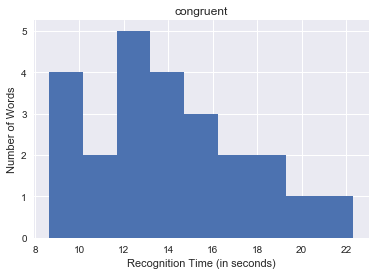


-------------------------- Incongruent --------------------------
Mean: 22.02
Median: 21.02
Variance: 23.01
Standard Deviation: 4.8
Standard Error: 1.0


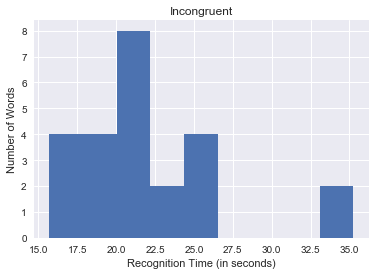

In [6]:
congruent_timings = [float(row['Congruent']) for row in timings]
describe_data(congruent_timings, 'congruent')

incongruent_timings = [float(row['Incongruent']) for row in timings]
describe_data(incongruent_timings, 'Incongruent')

# A picture is worth a thousand words

Now that I have my measures for central tendencies, I will plot the distribution of number of words w.r.t recognition time for both congruent and incongruent lists.

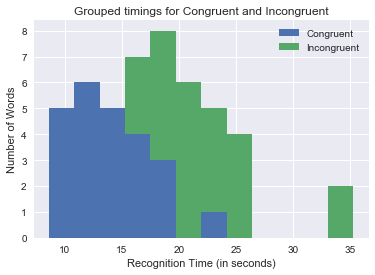

In [7]:
stacked_timings = [congruent_timings, incongruent_timings]
label_texts = ['Congruent', 'Incongruent']
plt.hist(stacked_timings, 12, histtype='bar', stacked=True, label=label_texts)
plt.xlabel('Recognition Time (in seconds)')
plt.ylabel('Number of Words')
plt.title('Grouped timings for Congruent and Incongruent')
plt.legend()
plt.show()


## Observations from our graphs 

Quite clearly the time taken for incomgruent lists is more than that of congruent lists. Also, both charts appear to be right skewed.

# Statistical test and Results

For my tests, I will use the following:

α = .01

degrees of freedom = 23

t-critical value = 2.807



In [8]:
difference_data = [(float(row['Congruent']) - float(row['Incongruent'])) for row in timings]
diff_mean = mean(difference_data)
diff_variance = variance(difference_data, diff_mean)
diff_standard_deviation = math.sqrt(diff_variance)
t_stat = round(diff_mean/(diff_standard_deviation / math.sqrt(len(difference_data))), 2)
print("t-statistic calculated is: {}".format(t_stat))


t-statistic calculated is: -8.02


At α = .01 or 99% confidence level, t-critical value is 2.807 for a two tailed test. Since t-statistic is outside the t-critical region, I will reject the null hypothesis. I also noticed that t-statistic is negative, so the difference between congruent and incongruent lists seems to be negative. In other words, incongruent lists take more time to read. At α = .01, we can say that there is a statisticaly significant difference in time taken to recongnize the color for congruent and incongruent lists.

My initial intution was that incongruent lists would take more time to read, but for my experiment, I just wanted to determine if there was significant difference between both the lists, in either direction. As we can see from the result, there is a difference and as expected.

# Think some more

- What do you think is responsible for the effects observed? 
    
    If I have to make a guess, I would say that human brain can either focus on color or the word. If the color and word are same, there is just one recognition task, either of color or word. When the color and word don't match, there is another decision that brain has to make, say the color or say the word. This decision making depends on each person and hence the time taken for incongruent lists will be more for most people.
    
- Can you think of an alternative or similar task that would result in a similar effect?

    Another task that can be similar to this would be counting number of characters in word. One set of words will be words for numbers, for example four, three, two, ten. Another set of words would be any other word that doesn't represent a number. The set with numbers should be difficult to count as the mind would try to read the word as number rather than counting characters.
    
## Sources
- Udacity Lectures from Machine Learning Foundation Nano Degree.